In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
sbi = pd.read_csv(r"C:\Users\Atharva\Downloads\SBI_Historical_Data.csv")
sbi.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


# Q. 1 As part of EDA, perform the following tasks:


### a. Print dimensions of the data

In [4]:
sbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1385 non-null   object 
 1   Price     1385 non-null   float64
 2   Open      1385 non-null   float64
 3   High      1385 non-null   float64
 4   Low       1385 non-null   float64
 5   Vol.      1385 non-null   object 
 6   Change %  1385 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.9+ KB


In [6]:
sbi.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


In [22]:
sbi.size

9695

In [23]:
sbi.shape

(1385, 7)

### b. Dimensions of Dataset

In [20]:
print(sbi.ndim)

2


### c. Statistical Summary

In [24]:
for i in sbi.select_dtypes(include=np.number):
    print("Statistical Summary of the ",i,"is mentioned : ")
    print(sbi[i].describe())

Statistical Summary of the  Price is mentioned : 
count    1385.000000
mean      266.274404
std        45.555277
min       150.850000
25%       245.650000
50%       270.800000
75%       296.150000
max       372.400000
Name: Price, dtype: float64
Statistical Summary of the  Open is mentioned : 
count    1385.000000
mean      266.903213
std        45.590664
min       151.950000
25%       245.900000
50%       271.150000
75%       296.500000
max       371.950000
Name: Open, dtype: float64
Statistical Summary of the  High is mentioned : 
count    1385.000000
mean      270.343682
std        45.829745
min       153.200000
25%       248.800000
50%       274.600000
75%       300.750000
max       373.800000
Name: High, dtype: float64
Statistical Summary of the  Low is mentioned : 
count    1385.000000
mean      262.757906
std        45.248334
min       148.250000
25%       242.550000
50%       267.400000
75%       292.200000
max       366.200000
Name: Low, dtype: float64


### d. Converting Date

In [25]:
sbi['Date'] = pd.to_datetime(sbi['Date'])

for i in sbi:
    print("Datatype of the ",i,"is : ",sbi[i].dtypes)

Datatype of the  Date is :  datetime64[ns]
Datatype of the  Price is :  float64
Datatype of the  Open is :  float64
Datatype of the  High is :  float64
Datatype of the  Low is :  float64
Datatype of the  Vol. is :  object
Datatype of the  Change % is :  object


### e. Check Data Type and Missing Values

In [8]:
sbi.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [77]:
sbi.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Forecast    0
dtype: int64

In [10]:
sbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1385 non-null   object 
 1   Price     1385 non-null   float64
 2   Open      1385 non-null   float64
 3   High      1385 non-null   float64
 4   Low       1385 non-null   float64
 5   Vol.      1385 non-null   object 
 6   Change %  1385 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.9+ KB


### f. Index the dataset with Date 

In [12]:
sbi_bank = sbi.set_index("Date")
sbi_bank.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


# Q. 2 Perform time series analysis:



#### a. Visualize time series data

In [16]:
sbi.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


In [17]:
sbi2 = sbi
sbi2 = sbi.iloc[::-1]
sbi2

,Date,Price,Open,High,Low,Vol.,Change %
1384,"Jan 01, 2015",314.00,312.45,315.00,310.70,6.14M,0.69%
1383,"Jan 02, 2015",315.25,314.35,318.30,314.35,9.94M,0.40%
1382,"Jan 05, 2015",312.75,316.25,316.80,312.10,9.14M,-0.79%
1381,"Jan 06, 2015",299.90,310.00,311.10,298.70,15.33M,-4.11%
1380,"Jan 07, 2015",300.15,300.00,302.55,295.15,15.05M,0.08%
...,...,...,...,...,...,...,...
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%


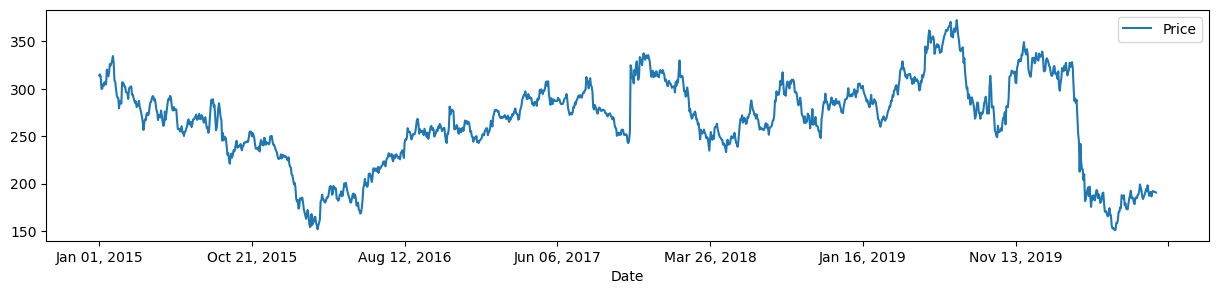

In [18]:
sbi2.plot.line(x = 'Date',y = 'Price',figsize=(15,3))
plt.show() 

### b. Check Stationarity with:



#### - ADF Test

* H0 : - The data is  non-stationary
* H1 : - The data is  stationary

* Alpha = 0.05

In [15]:
from statsmodels.tsa.stattools import adfuller
sbi_test = adfuller(sbi['Price'])
sbi_output=pd.Series(sbi_test[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
sbi_output

Test Statistic                   -2.683735
p-value                           0.076895
#lags used                        7.000000
number of observations used    1377.000000
dtype: float64

* we do not Reject Ho
* The data is stationary

#### - KPSS Test

* H0 : - The data is  non-stationary
* H1 : - The data is  stationary

* Alpha = 0.05

In [33]:
from statsmodels.tsa.stattools import kpss
sbi_test = adfuller(sbi['Price'])
sbi_output=pd.Series(sbi_test[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
sbi_output

Test Statistic                   -2.683735
p-value                           0.076895
#lags used                        7.000000
number of observations used    1377.000000
dtype: float64

* we do not Reject Ho
* The data is stationary

### c. Perform decomposing  

# Q. 3 Forecast about the stock price using ARIMA. Steps to be performed:

### a. Parameter Selection using gridsearch

In [54]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(sbi.Price,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series
                      seasonal=False,    # No Seasonality  then below P,D,Q will not be used 
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19441.529, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=17564.252, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8897.413, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8897.830, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=8898.827, Time=0.43 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=8899.729, Time=0.43 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=8890.987, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12829.475, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8891.476, Time=0.63 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8892.119, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14511.88

In [56]:
import numpy as np
sbi['Forecast']=np.round(model.predict_in_sample(),0)
sbi.iloc[:,[0,1,7]]

,Date,Price,Forecast
0,2020-08-07,190.65,264.0
1,2020-08-06,190.95,191.0
2,2020-08-05,191.45,192.0
3,2020-08-04,191.60,192.0
4,2020-08-03,192.25,192.0
...,...,...,...
1380,2015-01-07,300.15,305.0
1381,2015-01-06,299.90,300.0
1382,2015-01-05,312.75,300.0
1383,2015-01-02,315.25,312.0


### b. Fit ARIMA model as per the selected optimum value of parameters

In [59]:
import numpy as np
sbi['Forecast']=np.round(model.predict_in_sample(),0)
sbi.iloc[:,[0,1,7]]

,Date,Price,Forecast
0,2020-08-07,190.65,264.0
1,2020-08-06,190.95,191.0
2,2020-08-05,191.45,192.0
3,2020-08-04,191.60,192.0
4,2020-08-03,192.25,192.0
...,...,...,...
1380,2015-01-07,300.15,305.0
1381,2015-01-06,299.90,300.0
1382,2015-01-05,312.75,300.0
1383,2015-01-02,315.25,312.0


### c. Validate forecast

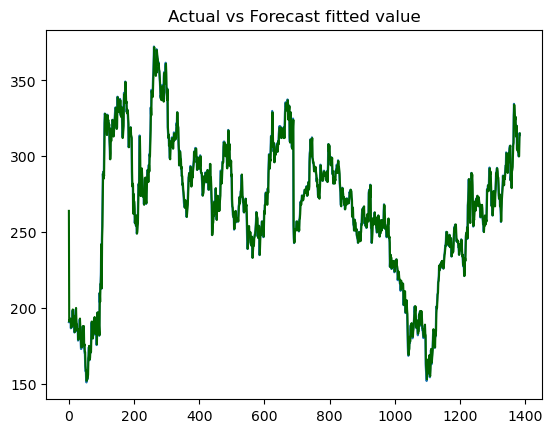

In [58]:

plt.plot(sbi.Price)
plt.plot(sbi.Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

### d. Calculate the MSE and RMSE

In [60]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'mape':mape})

forecast_accuracy(sbi.Price,sbi.Forecast)

{'mape': 1.6371308549232768}

In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error
sbi_mse1=sbi['Price']
sbi_mse2=sbi['Forecast']
mse= mean_squared_error(sbi_mse1,sbi_mse2)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Root Mean Squared Error (RMSE): 6.28


### e. Visualize the forecast

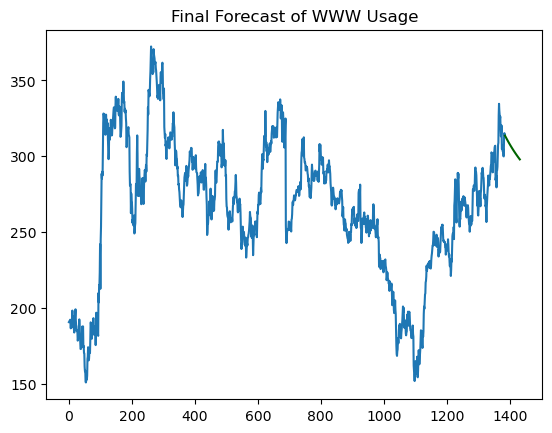

In [65]:
n_periods=48
fc = model.predict(n_periods=n_periods)
index_of_fc = np.arange(len(sbi.Price), len(sbi.Price)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)

# Plot
plt.plot(sbi.Price)
plt.plot(fc_series, color='darkgreen')
plt.title("Final Forecast of WWW Usage")
plt.show()

In [66]:
fc

1385    313.595289
1386    313.196504
1387    312.800937
1388    312.408562
1389    312.019353
1390    311.633284
1391    311.250331
1392    310.870467
1393    310.493669
1394    310.119911
1395    309.749169
1396    309.381418
1397    309.016635
1398    308.654795
1399    308.295875
1400    307.939851
1401    307.586699
1402    307.236398
1403    306.888922
1404    306.544251
1405    306.202361
1406    305.863229
1407    305.526834
1408    305.193153
1409    304.862165
1410    304.533847
1411    304.208178
1412    303.885138
1413    303.564704
1414    303.246855
1415    302.931571
1416    302.618832
1417    302.308615
1418    302.000902
1419    301.695672
1420    301.392904
1421    301.092580
1422    300.794679
1423    300.499182
1424    300.206069
1425    299.915321
1426    299.626919
1427    299.340844
1428    299.057078
1429    298.775601
1430    298.496396
1431    298.219443
1432    297.944725
dtype: float64